In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline

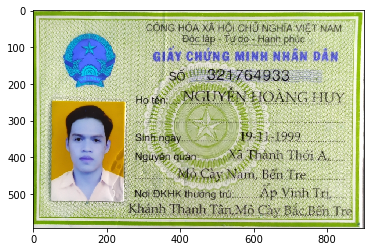

In [2]:
image_path='image/huy_cmnd.jpg'
image=cv2.imread(image_path)
width_image=image.shape[1]
height_image=image.shape[0]
plt.imshow(image)

# delete Green

finisded


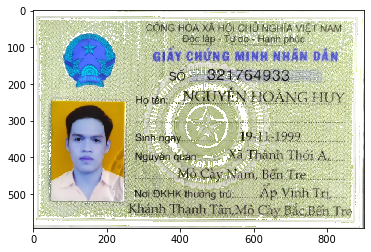

In [3]:
for h in range(height_image):
    for w in range(width_image):
        (b,g,r)=image[h][w].astype('int16')
        if ((g-b)>15) and ((g-r)>15):
            image[h][w]=(255,255,255)
print('finisded')
plt.imshow(image)

# gray

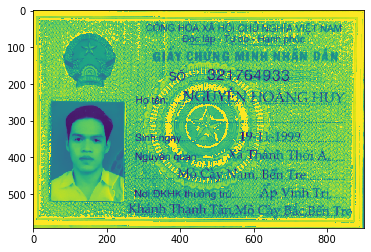

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

# Crop

## so 

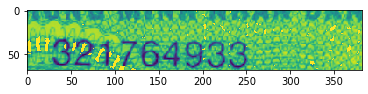

In [5]:
#so cmnd
h_so=int(height_image*0.11538)
w_so=int(height_image*0.646)
x_so=int(height_image*0.753846)
y_so=int(height_image*0.2153846)
image_so=image[y_so:y_so+h_so,x_so:x_so+w_so]
plt.imshow(image_so)

## ten

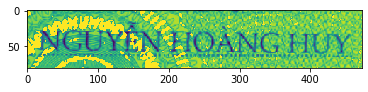

In [6]:
#ten cm
h_ten=int(height_image*0.1385)
w_ten=int(height_image*0.8)
x_ten=int(height_image*0.6615)
y_ten=int(height_image*0.323)
image_ten0=image[y_ten:y_ten+h_ten,x_ten:x_ten+w_ten]
plt.imshow(image_ten0)

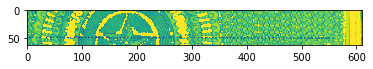

In [7]:
#ten cm
h_ten1=int(height_image*0.1077)
w_ten1=int(height_image*1.03077)
x_ten1=int(height_image*0.4923)
y_ten1=int(height_image*0.43077)
image_ten1=image[y_ten1:y_ten1+h_ten1,x_ten1:x_ten1+w_ten1]
plt.imshow(image_ten1)

## ngay sinh

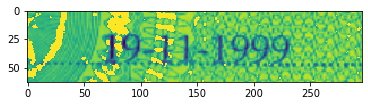

In [8]:
h_ngaySinh=int(height_image*0.1077)
w_ngaySinh=int(height_image*0.5)
x_ngaySinh=int(height_image*0.8385)
y_ngaySinh=int(height_image*0.5230769)
image_ngaySinh=image[y_ngaySinh:y_ngaySinh+h_ngaySinh,x_ngaySinh:x_ngaySinh+w_ngaySinh]
plt.imshow(image_ngaySinh)

## nguyen quan

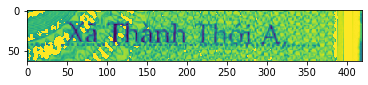

In [9]:
h_nguyenQuan=int(height_image*0.1077)
w_nguyenQuan=int(height_image*0.7385)
x_nguyenQuan=int(height_image*0.815385)
y_nguyenQuan=int(height_image*0.61538)
image_nguyenQuan0=image[y_nguyenQuan:y_nguyenQuan+h_nguyenQuan,x_nguyenQuan:x_nguyenQuan+w_nguyenQuan]
plt.imshow(image_nguyenQuan0)

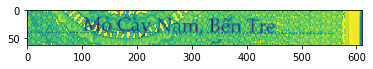

In [10]:
h_nguyenQuan1=int(height_image*0.1077)
w_nguyenQuan1=int(height_image*1.03077)
x_nguyenQuan1=int(height_image*0.4923)
y_nguyenQuan1=int(height_image*0.7077)
image_nguyenQuan1=image[y_nguyenQuan1:y_nguyenQuan1+h_nguyenQuan1,x_nguyenQuan1:x_nguyenQuan1+w_nguyenQuan1]
plt.imshow(image_nguyenQuan1)

## Noi DKHK:

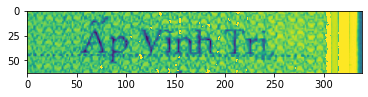

In [11]:
h_noiDKHK=int(height_image*0.1077)
w_noiDKHK=int(height_image*0.60385)
x_noiDKHK=int(height_image*0.95)
y_noiDKHK=int(height_image*0.784615)
image_noiDKHK0=image[y_noiDKHK:y_noiDKHK+h_noiDKHK,x_noiDKHK:x_noiDKHK+w_noiDKHK]
plt.imshow(image_noiDKHK0)

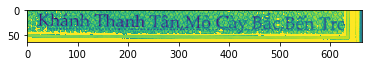

In [12]:
h_noiDKHK1=int(height_image*0.1077)
w_noiDKHK1=int(height_image*1.1577)
x_noiDKHK1=int(height_image*0.4023)
y_noiDKHK1=int(height_image*0.877)
image_noiDKHK1=image[y_noiDKHK1:y_noiDKHK1+h_noiDKHK1,x_noiDKHK1:x_noiDKHK1+w_noiDKHK1]
plt.imshow(image_noiDKHK1)

## blur

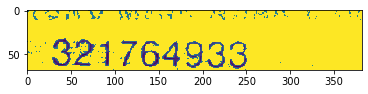

In [13]:
image_so=np.where(image_so<120,image_so,255)
plt.imshow(image_so)

In [14]:
pytesseract.image_to_string(image_so)

'A a\n\nB24 764933'

In [15]:
def blur_otsu(image):
    image_blur=np.where(image<120,image,255)

    blured1 = cv2.medianBlur(image_blur,3)
    blured2 = cv2.medianBlur(image_blur,51)
    divided = np.ma.divide(blured1, blured2)
    normed = np.uint8(255*divided/divided.max())
    th, threshed = cv2.threshold(normed, 0, 255,  cv2.THRESH_OTSU)
    
    return threshed


# OCR

In [16]:
def OCR_image(image):
    image=blur_otsu(image)
    plt.imshow(image)
    text=pytesseract.image_to_string(image)
    print(text)


. 321764933


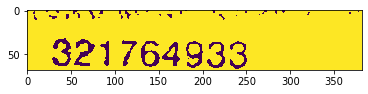

In [17]:
OCR_image(image_so)

NGUYEN HOANG HUY


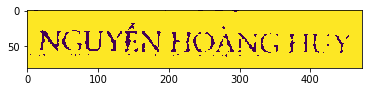

In [18]:
OCR_image(image_ten0)

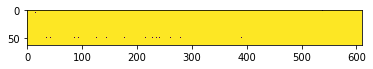

In [19]:
OCR_image(image_ten1)

19-1 1-L999


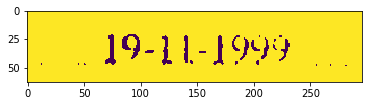

In [20]:
OCR_image(image_ngaySinh)

Xa Phanh Thay A,


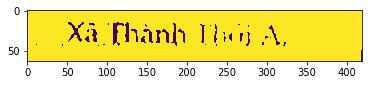

In [21]:
OCR_image(image_nguyenQuan0)

Mo Cay. Nam, Bén tre .


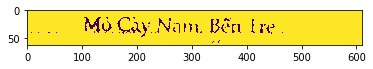

In [22]:
OCR_image(image_nguyenQuan1)

Ap Vinh in


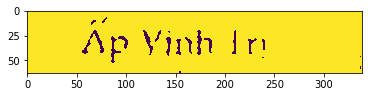

In [23]:
OCR_image(image_noiDKHK0)

Khanh Thanh Tan,.Mo Cay Bac. Bén Ire |


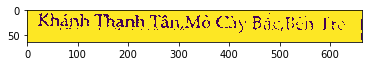

In [24]:
OCR_image(image_noiDKHK1)

# contours

In [29]:
import imutils
def OCR_contours(image):
    image=blur_otsu(image)
    contours = cv2.findContours(image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[1] if imutils.is_cv3() else contours[0]

    bb_list = []
    for c in contours:  
        (x, y, w, h) = cv2.boundingRect(c)
        # save all boxes except the one that has the exact dimensions of the image (x, y, width, height)
        if (x == 0 and y == 0 and w == image.shape[1] and h == image.shape[0]):
            continue

        bb_list.append((x, y, w, h))


    #### sort bounding boxes by the X value: first item is the left-most box
    bb_list.sort(key=lambda x:x[1])

    ### remove the last item from the list, i.e. remove box for letter M
    bb_list = bb_list[:-1]

    point_list=[(0,0,0,0)]
    (x_word,y_word,w_word,h_word)=(image.shape[1],image.shape[0],0,0)

    # debug: draw the text region of interest
    roi_img = image.copy()
    for b in bb_list :
        (x,y,w,h)=b
        if h >((10*roi_img.shape[0])/100) :
            x_word=min(x_word,x)     
            y_word=min(y_word,y)
            w_word=max(w_word,x+w)
            h_word=max(h_word,y+h)

    w_word=w_word-x_word
    h_word=h_word-y_word
    
    try:
#         thr=0
#         if (y_word>=thr):
#             y_word-=thr
#         else:
#             y_word=0
        
#         if (x_word>=thr):
#             x_word-=thr
#         else:
#             x_word=0
        find=np.pad(image[y_word:y_word+h_word,x_word:x_word+w_word], 15, mode='constant',constant_values=255)
        #find=image[y_word:y_word+h_word+thr*2,x_word:x_word+w_word+thr*2]
        plt.imshow(find)
        
        text=pytesseract.image_to_string(find)
        print(text)
        plt.show()
    except:
        print()
    
    

a as

“321 764933


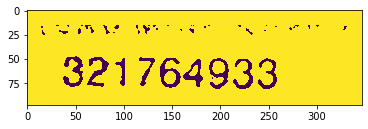

NGUYEN HOANG HUY


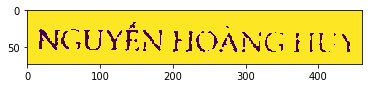

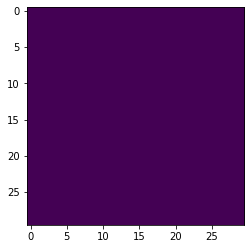

19-11-1999


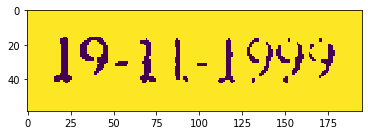

Xa Phanh Thay A,


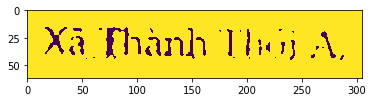

Mo Cay. Nam, Bén tre .


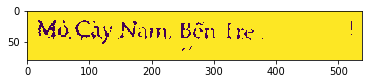

Ap Vinh in


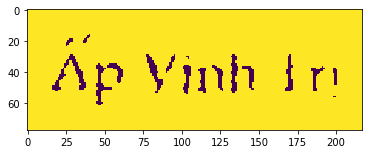

Khanh Thanh Tan.Mo Cay Ba.Bén Fre |


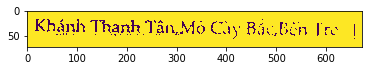

In [30]:
OCR_contours(image_so)
OCR_contours(image_ten0)
OCR_contours(image_ten1)
OCR_contours(image_ngaySinh)
OCR_contours(image_nguyenQuan0)
OCR_contours(image_nguyenQuan1)
OCR_contours(image_noiDKHK0)
OCR_contours(image_noiDKHK1)